In [2]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from datetime import timedelta
import matplotlib.dates as mdates

In [3]:
#문제 별 난이도 구하기
base = "https://www.acmicpc.net/problemset/"
diff = {}
for i in range(1, 164):
    url = base + str(i)
    htmlSrc = requests.get(url).text
    arr = htmlSrc.split('<td class="list_problem_id">')
    del arr[0]
    for obj in arr:
        prob = obj.split("</td>")[0]
        ans = obj.split(';result_id=4">')[1].split('</a>')[0]
        diff[prob] = 1.029**(max(0, 25000**0.5-int(ans)**0.5))

In [4]:
#시작 페이지 불러오기
def getStartPage(id):
    l = 30000
    r = 13555310
    url = "https://www.acmicpc.net/status?user_id=" + id + "&language_id=-1&result_id=4&top=1"
    htmlSrc = requests.get(url).text
    tmp = htmlSrc.split('" id = "prev_page">')[0].split('<a href = "')
    tmp = tmp[len(tmp)-1]
    url = 'https://www.acmicpc.net' + tmp
    url = url.replace("&amp;", "&")
    return url

In [5]:
'''
flag = True : 중복 허용
flag = False : 중복 불가
'''
#푼 문제 불러오기 : {date:YYYYMMDDhhmmss, prob:4008}
def getSolveList(id, flag):
    ret = []
    url = getStartPage(id)
    probList = set()
    timeList = set()
    #print("Start Page : ", url)
    while(True):
        #print(url)
        htmlSrc = requests.get(url).text
        
        # get Date
        dateArr = htmlSrc.split('" data-timestamp="')
        del dateArr[0]
        for x in range(0, len(dateArr)):
            dateArr[x] = dateArr[x].split('" class="real-time-update')[0]
            dateArr[x] = datetime.fromtimestamp(int(dateArr[x])).strftime("%Y%m%d%H%M%S")
        
        # get Problem
        problemArr = htmlSrc.split('<td><a href="/problem/')
        del problemArr[0]
        for x in range(0, len(problemArr)):
            problemArr[x] = problemArr[x].split('" rel="tooltip"')[0]
        
        for i in range(len(problemArr)-1, -1, -1):
            if(dateArr[i] in timeList): continue
            timeList.add(dateArr[i])
            if(flag): ret.append({"date": dateArr[i], "prob": problemArr[i]})
            else:
                if(problemArr[i] not in probList):
                    probList.add(problemArr[i])
                    ret.append({"date": dateArr[i], "prob": problemArr[i]})
        
        if('id = "prev_page"' not in htmlSrc): break
        tmp = htmlSrc.split('" id = "prev_page">')[0].split('<a href = "')
        tmp = tmp[len(tmp)-1]
        url = 'https://www.acmicpc.net' + tmp
        url = url.replace("&amp;", "&")
    #print(len(ret))
    return ret

In [9]:
#일 별 문제 수 불러오기 : {YYYYMMDD: cnt}
def getNumByDate(id, flag):
    ret = {}
    x = getSolveList(id, flag)
    for i in x:
        now = int(i["date"])//1000000
        if(now in ret):
            ret[now] += 1
        else:
            ret[now] = 1
    
    d1 = datetime(2013, 1, 1)
    d2 = datetime(2019, 6, 30)
    delta = d2 - d1
    for x in range(delta.days + 1):
        now = (d1 + timedelta(days=x)).strftime("%Y-%m-%d")
        i = int(now[0:4])*10000 + int(now[5:7])*100 + int(now[8:10])
        if(i not in ret):
            ret[i] = 0
    return ret

In [10]:
#월 별 문제 수 불러오기 : {YYYYMM: cnt}
def getNumByMonth(id, flag):
    ret = {}
    x = getNumByDate(id, flag)
    for i in x:
        now = i // 100
        if(now in ret): ret[now] += x[i]
        else: ret[now] = x[i]
    return ret


In [11]:
jhnah917_byDate = getNumByDate("jhnah917", False)
jhnah917_byMonth = getNumByMonth("jhnah917", False)
liasly_byDate = getNumByDate("liasly", False)
liasly_byMonth = getNumByMonth("liasly", False)
hyoseung6030_byDate = getNumByDate("hyoseung6030", False)
hyoseung6030_byMonth = getNumByMonth("hyoseung6030", False)
klimmek55_byDate = getNumByDate("klimmek55", False)
klimmek55_byMonth = getNumByMonth("klimmek55", False)

<Figure size 3000x2000 with 0 Axes>

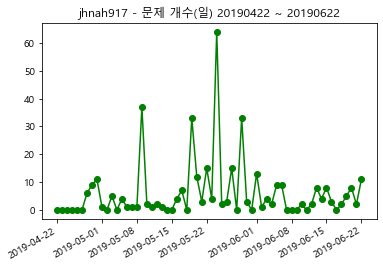

<Figure size 3000x2000 with 0 Axes>

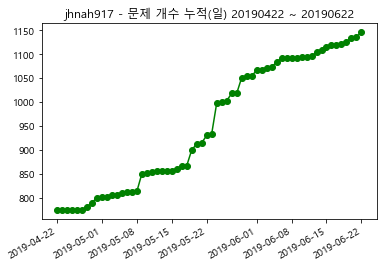

<Figure size 3000x2000 with 0 Axes>

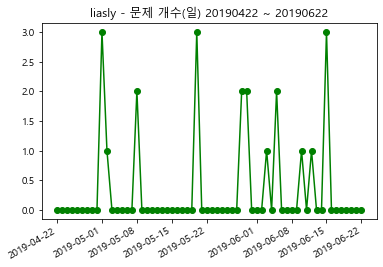

<Figure size 3000x2000 with 0 Axes>

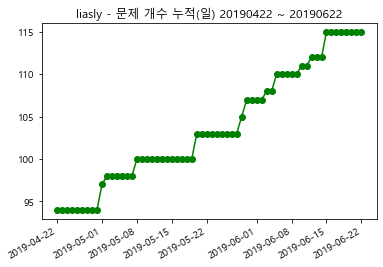

<Figure size 3000x2000 with 0 Axes>

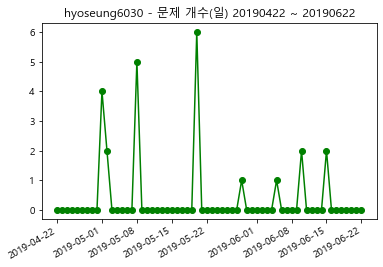

<Figure size 3000x2000 with 0 Axes>

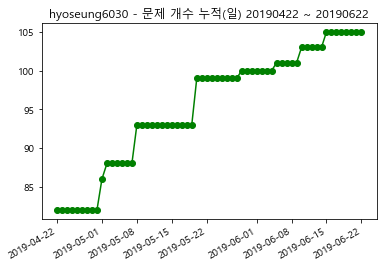

<Figure size 3000x2000 with 0 Axes>

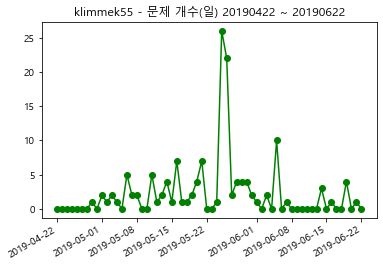

<Figure size 3000x2000 with 0 Axes>

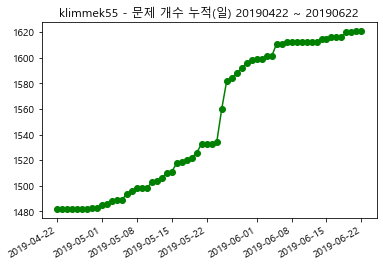

In [13]:
def showByDate(id, flag, start, end, preCompute=None):
    time = []
    prob = []
    x = None
    if(preCompute is None): x = getNumByDate(id, flag)
    else: x = preCompute
    x = sorted(x.items())
    for i in x:
        if(i[0] < start): continue
        if(i[0] > end): continue
        s = str(i[0])
        time.append(datetime(int(s[0:4]), int(s[4:6]), int(s[6:8])))
        prob.append(i[1])
    plt.rc('font', family="Malgun Gothic")
    plt.figure(dpi=500)
    fig, ax = plt.subplots(1)
    fig.autofmt_xdate()
    plt.plot_date(time, prob, color='green', marker='o', linestyle='solid')
    plt.title(id + " - 문제 개수(일) " + str(start) + " ~ " + str(end))
    plt.savefig("./" + id + "_date.png",dpi=1000)
    
    sum = []
    now = 0
    for i in x:
        now += i[1]
        if(i[0] < start): continue
        if(i[0] > end): continue
        sum.append(now)
    plt.rc('font', family="Malgun Gothic")
    plt.figure(dpi=500)
    fig, ax = plt.subplots(1)
    fig.autofmt_xdate()
    plt.plot_date(time, sum, color='green', marker='o', linestyle='solid')
    plt.title(id + " - 문제 개수 누적(일) " + str(start) + " ~ " + str(end))
    plt.savefig("./" + id + "_date_sum.png",dpi=1000)


showByDate("jhnah917", False, 20190422, 20190622, jhnah917_byDate)
showByDate("liasly", False, 20190422, 20190622, liasly_byDate)
showByDate("hyoseung6030", False, 20190422, 20190622, hyoseung6030_byDate)
showByDate("klimmek55", False, 20190422, 20190622, klimmek55_byDate)

<Figure size 3000x2000 with 0 Axes>

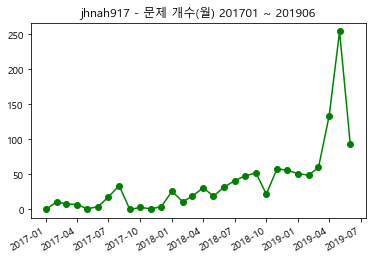

<Figure size 3000x2000 with 0 Axes>

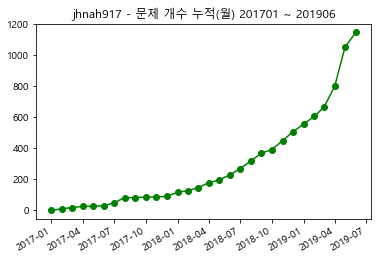

<Figure size 3000x2000 with 0 Axes>

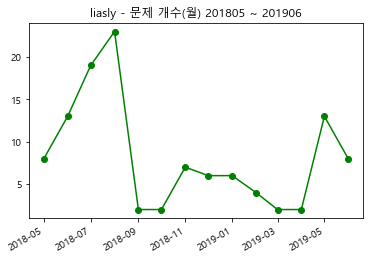

<Figure size 3000x2000 with 0 Axes>

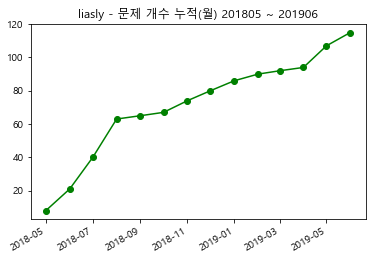

<Figure size 3000x2000 with 0 Axes>

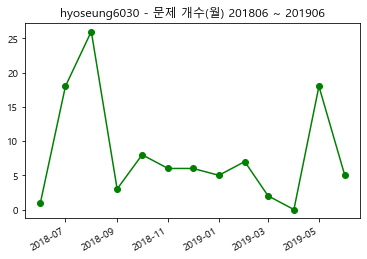

<Figure size 3000x2000 with 0 Axes>

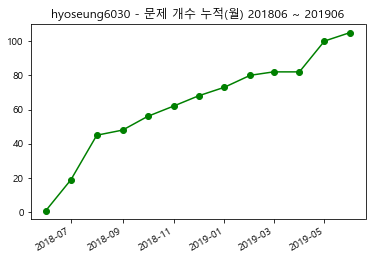

<Figure size 3000x2000 with 0 Axes>

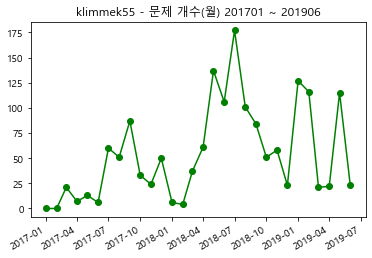

<Figure size 3000x2000 with 0 Axes>

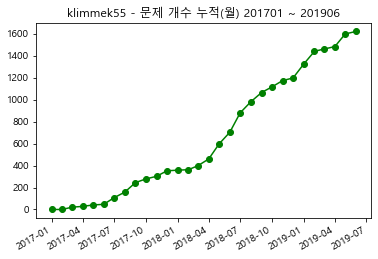

In [14]:
def showByMonth(id, flag, start, end, preCompute=None):
    time = []
    prob = []
    x = None
    if(preCompute is None): x = getNumByMonth(id, flag)
    else: x = preCompute
    x = sorted(x.items())
    for i in x:
        #print(i)
        if(i[0] < start): continue
        if(i[0] > end): continue
        s = str(i[0])
        time.append(datetime(int(s[0:4]), int(s[4:6]), 1))
        prob.append(i[1])
    plt.rc('font', family="Malgun Gothic")
    plt.figure(dpi=500)
    fig, ax = plt.subplots(1)
    fig.autofmt_xdate()
    plt.plot_date(time, prob, color='green', marker='o', linestyle='solid')
    plt.title(id + " - 문제 개수(월) " + str(start) + " ~ " + str(end))
    plt.savefig("./" + id + "_month.png",dpi=1000)
    
    sum = []
    now = 0
    for i in x:
        now += i[1]
        if(i[0] < start): continue
        if(i[0] > end): continue
        sum.append(now)
    plt.rc('font', family="Malgun Gothic")
    plt.figure(dpi=500)
    fig, ax = plt.subplots(1)
    fig.autofmt_xdate()
    plt.plot_date(time, sum, color='green', marker='o', linestyle='solid')
    plt.title(id + " - 문제 개수 누적(월) " + str(start) + " ~ " + str(end))
    plt.savefig("./" + id + "_month_sum.png",dpi=1000)

showByMonth("jhnah917", False, 201701, 201906, jhnah917_byMonth)
showByMonth("liasly", False, 201805, 201906, liasly_byMonth)
showByMonth("hyoseung6030", False, 201806, 201906, hyoseung6030_byMonth)
showByMonth("klimmek55", False, 201701, 201906, klimmek55_byMonth)

In [15]:
jhnah917_list = getSolveList("jhnah917", False)

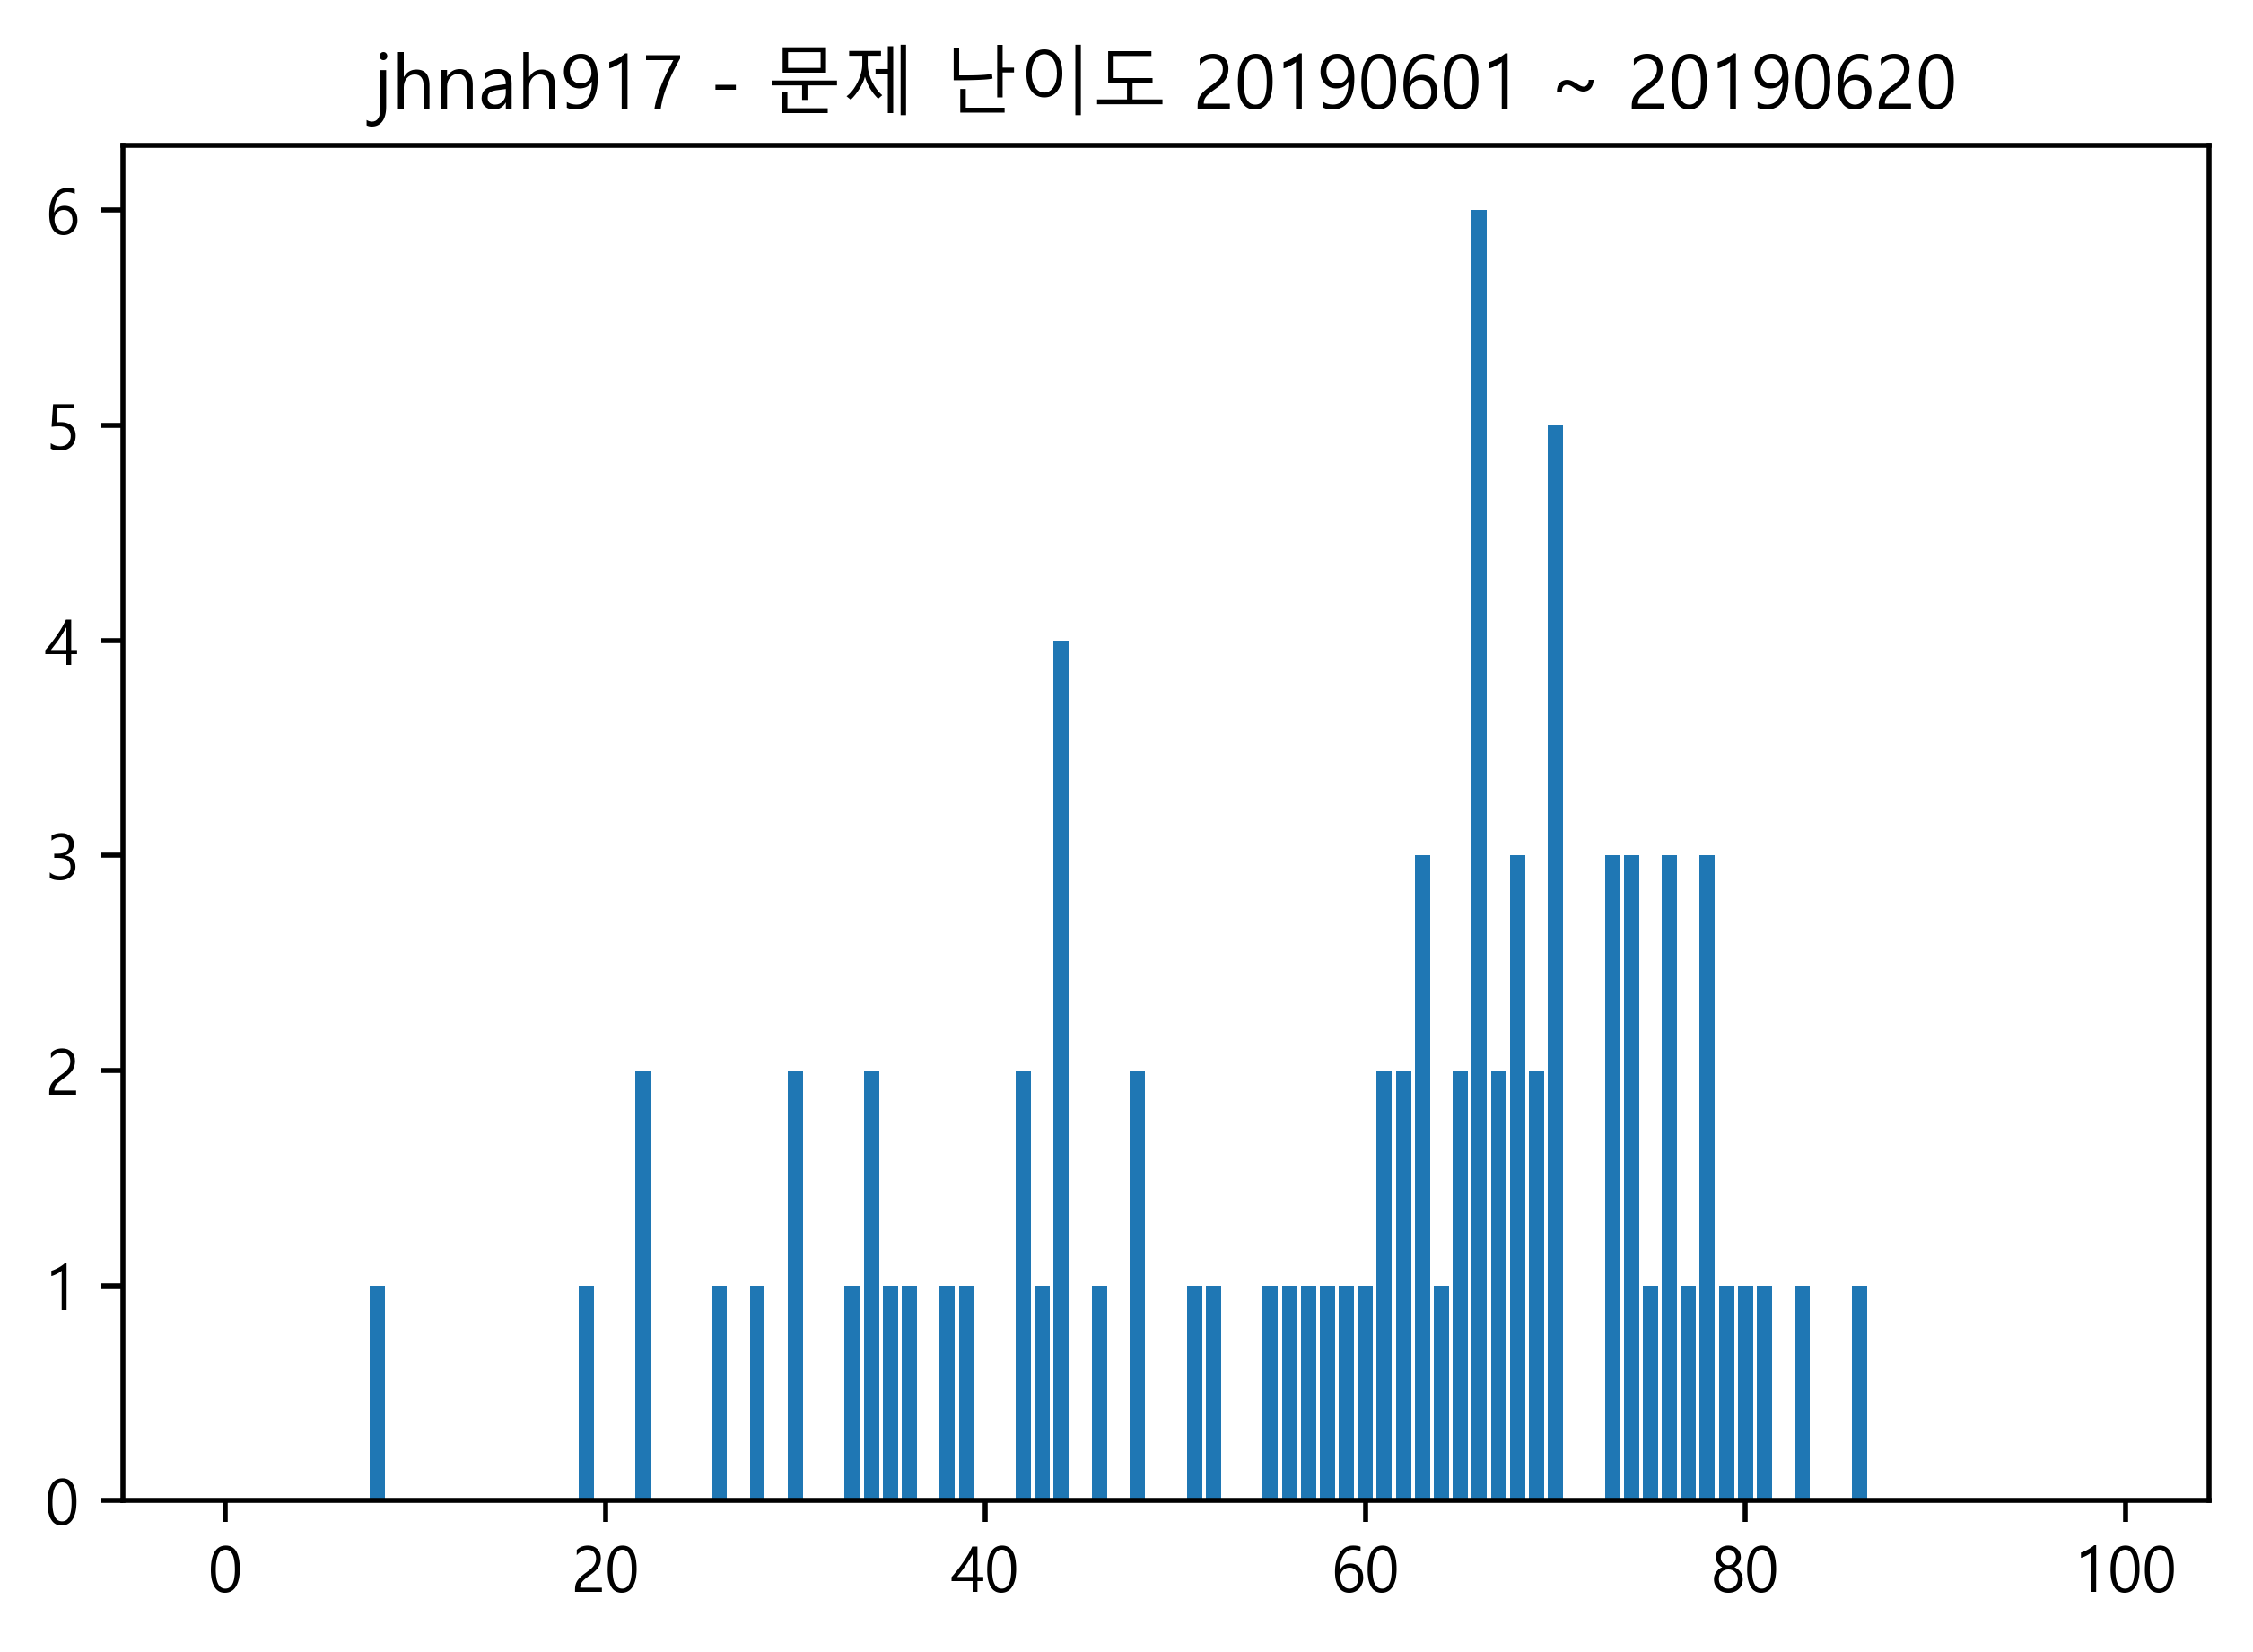

In [18]:
def showTierByDate(id, flag, start, end, preCompute=None):
    x = None
    tier = {}
    if(preCompute is None): x = getSolveList(id, flag)
    else: x = preCompute
    for i in x:
        now = int(i["date"])//1000000
        prob = i["prob"]
        if(prob not in diff): continue
        if(now in tier):
            tier[now].append(int(diff[prob]))
        else:
            tier[now] = []
            tier[now].append(int(diff[prob]))
    
    x_axis = []
    y_axis = []
    for i in range(0, 100):
        x_axis.append(i)
        y_axis.append(0)
    tmp = sorted(tier.items())
    for i in tmp:
        if(i[0] < start): continue
        if(i[0] > end): continue
        for j in i[1]:
            y_axis[j] += 1
    plt.rc('font', family="Malgun Gothic")
    plt.figure(dpi=500)
    plt.title(id + " - 문제 난이도 " + str(start) + " ~ " + str(end))
    plt.bar(x_axis, y_axis)
    plt.savefig("./" + id + "_tier.png",dpi=1000)

showTierByDate("jhnah917", False, 20190601, 20190620, jhnah917_list)

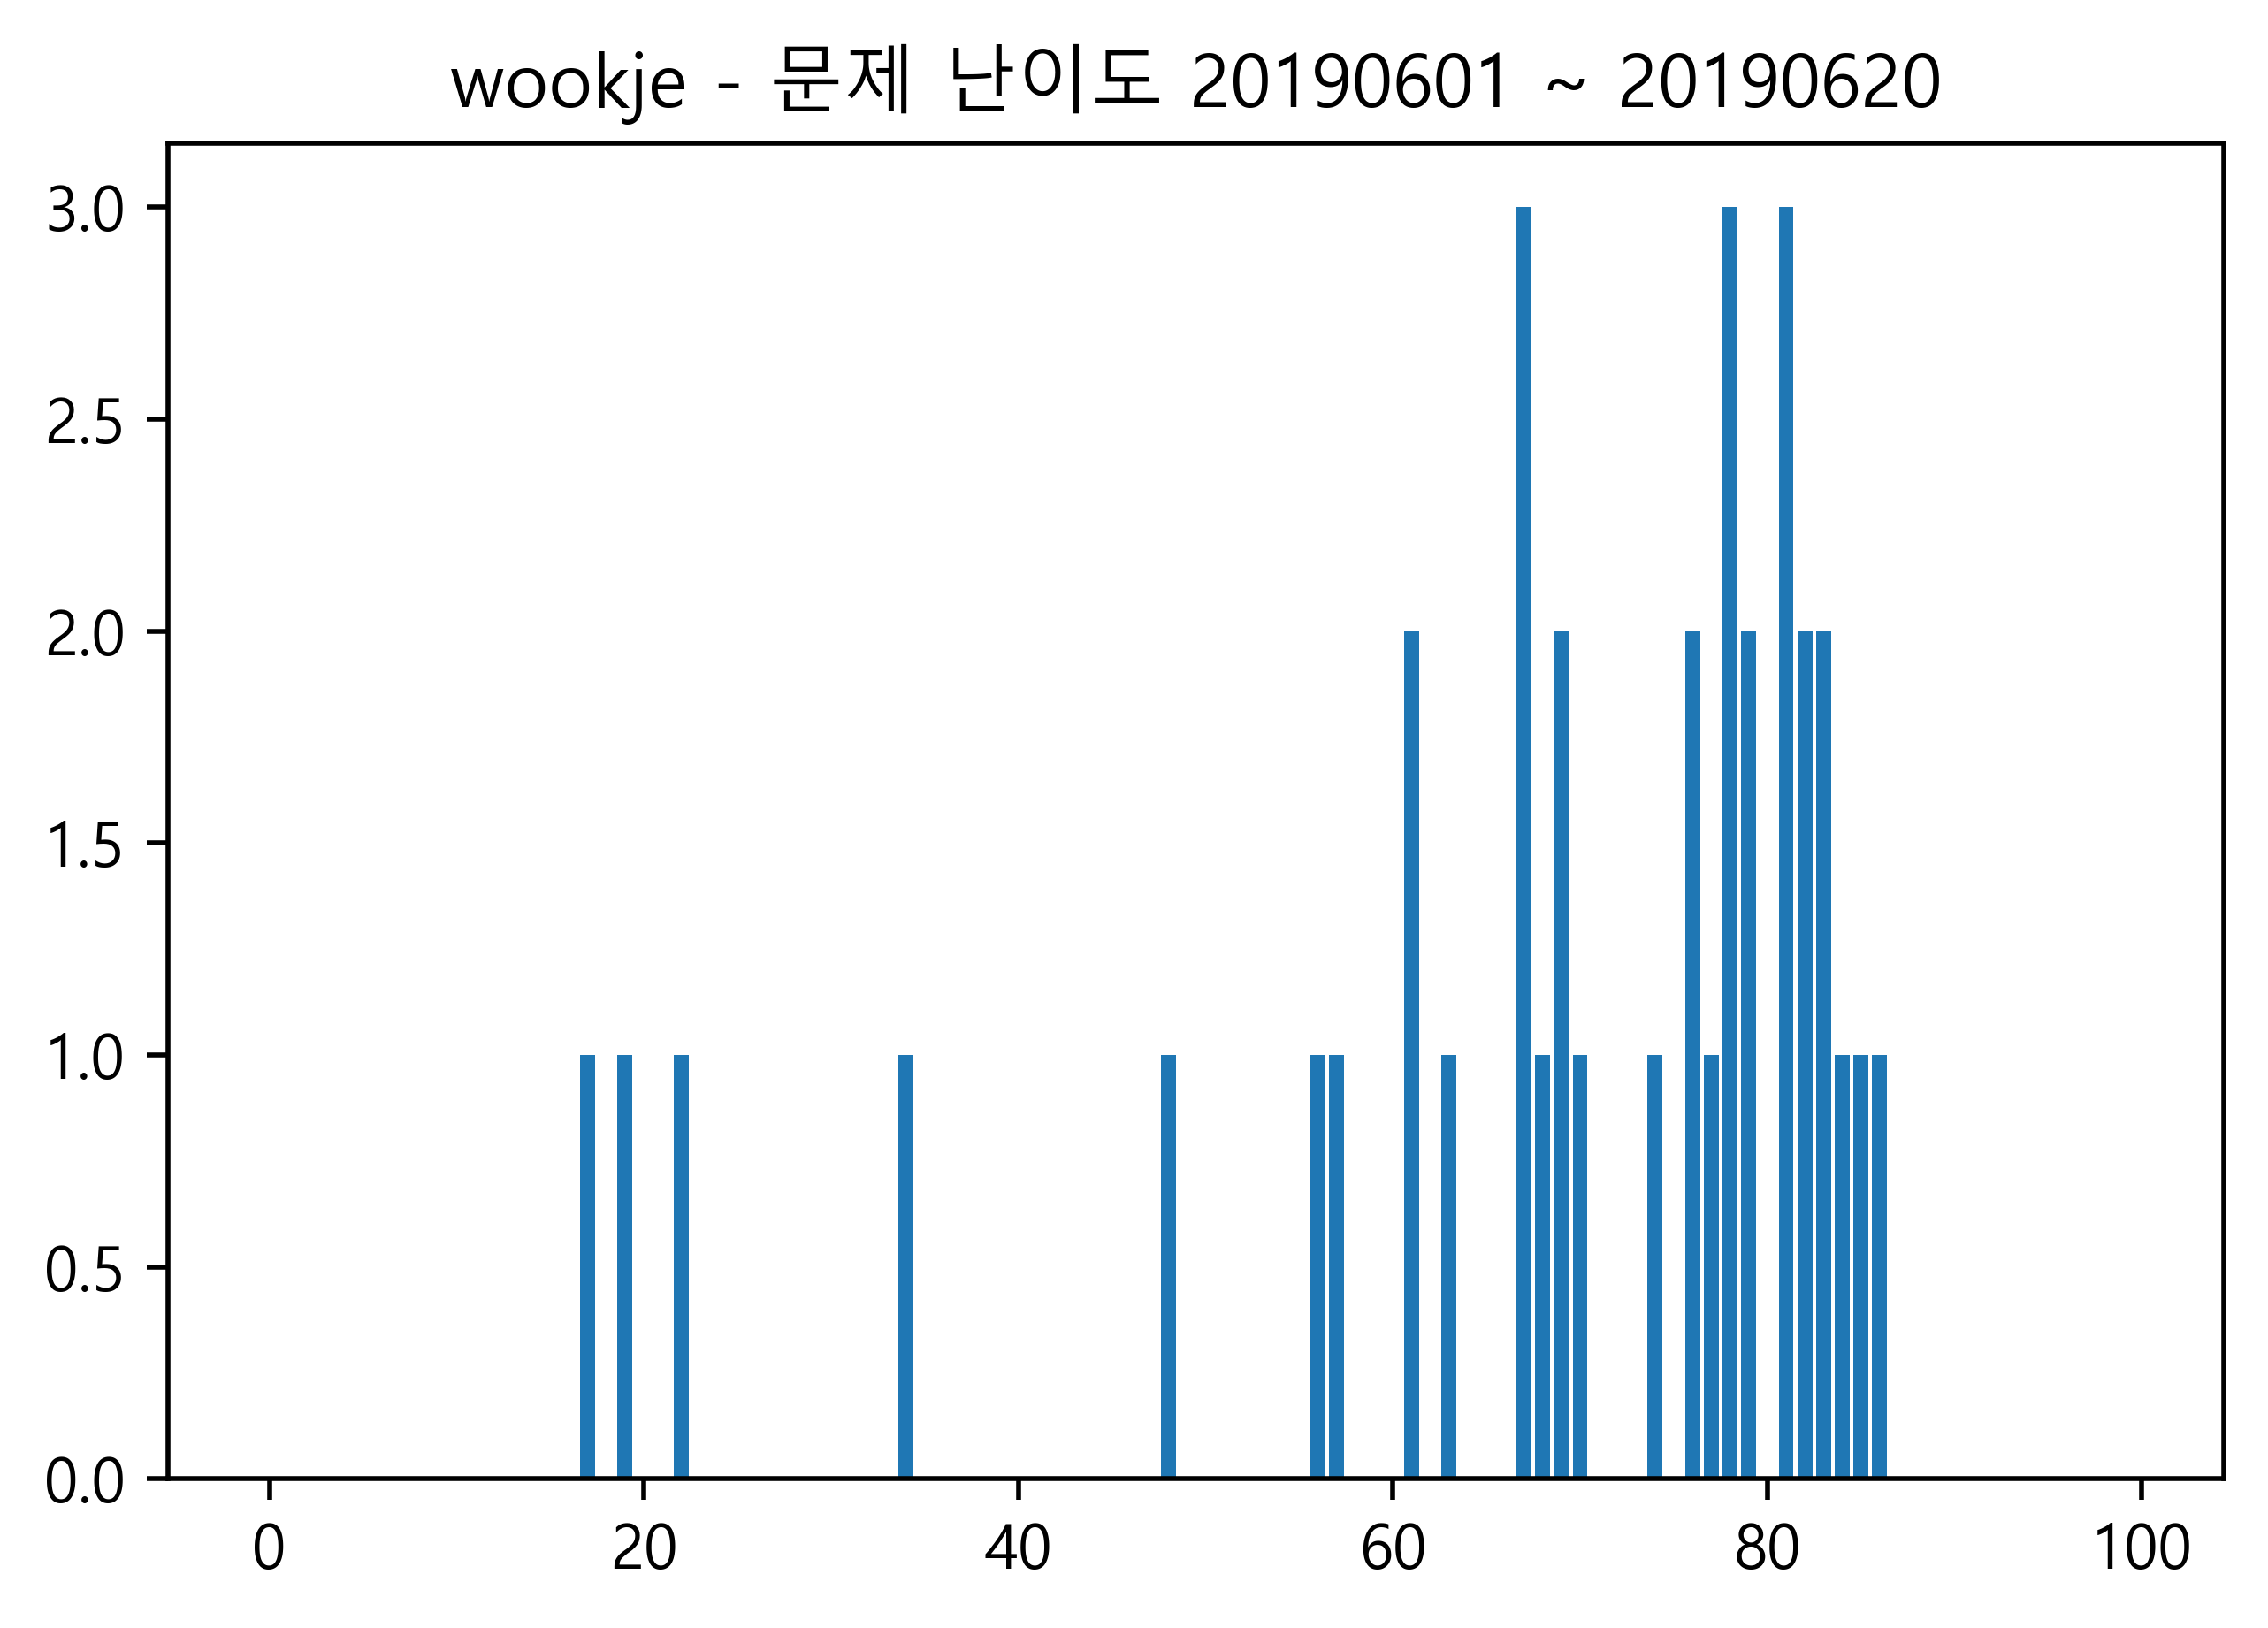

In [19]:
#showByDate("wookje", False, 20190422, 20190622)
#showByMonth("wookje", False, 201701, 201906)
showTierByDate("wookje", False, 20190601, 20190620)

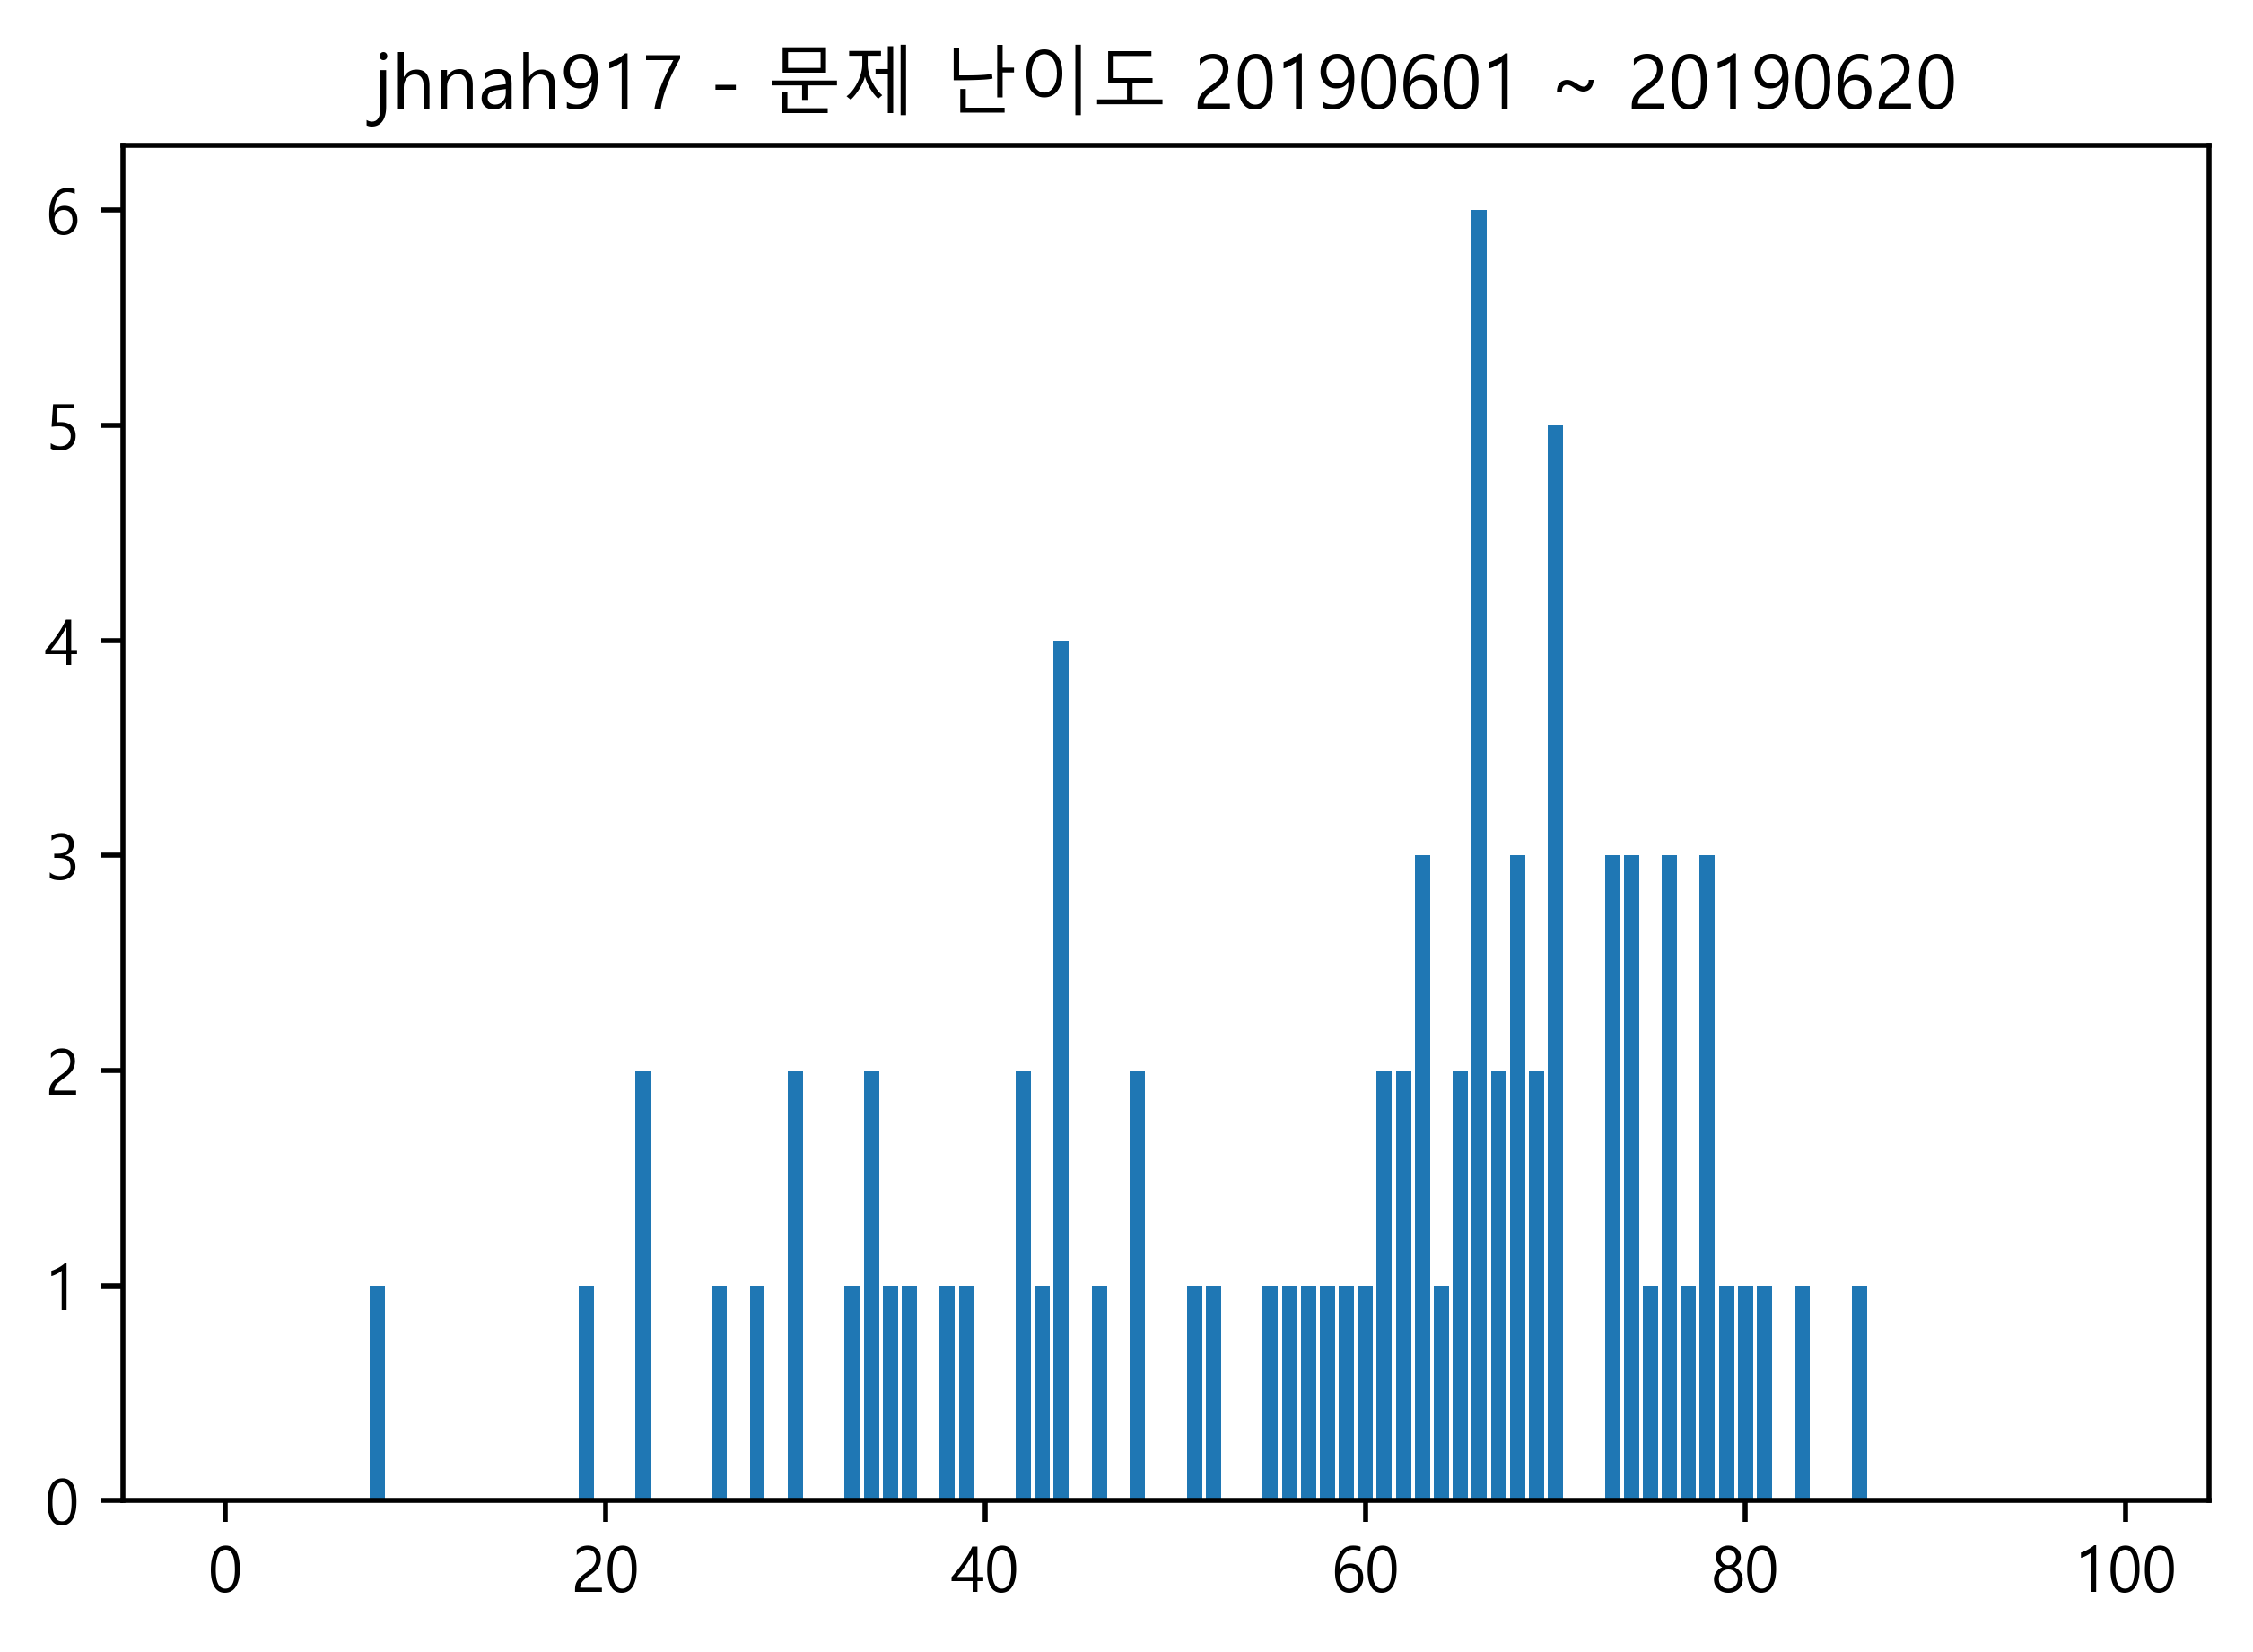

<Figure size 3000x2000 with 0 Axes>

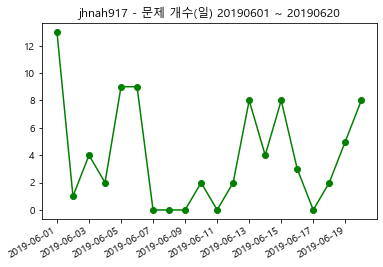

<Figure size 3000x2000 with 0 Axes>

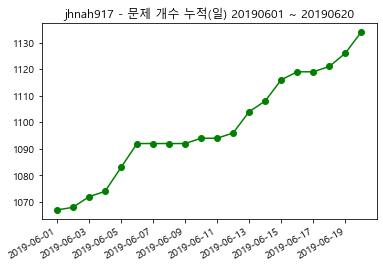

In [25]:
#showTierByDate("jhnah917", False, 20190101, 20190131, jhnah917_list)
#showTierByDate("jhnah917", False, 20190404, 20190504, jhnah917_list)
#showTierByDate("jhnah917", False, 20190505, 20190531, jhnah917_list)
showTierByDate("jhnah917", False, 20190601, 20190620, jhnah917_list)
#showByDate("jhnah917", False, 20190101, 20190131, jhnah917_byDate)
#showByDate("jhnah917", False, 20190404, 20190504, jhnah917_byDate)
#showByDate("jhnah917", False, 20190505, 20190531, jhnah917_byDate)
showByDate("jhnah917", False, 20190601, 20190620, jhnah917_byDate)